# Program Description of Machine Learning Modeling (Random Forest - Regression)

## Overview:
This module is responsible for building a Random Forest (RF) model for regression tasks. It reads the normalized dataset output by **Module 9**, trains the Random Forest model, and saves the best-performing model. This module works in parallel with other models like CNN and MLP for comparison purposes.

## Key Steps:
1. **Dataset Input**:
   - The normalized training and validation datasets (features and labels) generated by **Module 9** are used as input for the Random Forest model.

2. **Random Forest Model Construction**:
   - A Random Forest model is constructed for regression, where the model predicts continuous values based on the input features.

3. **Training and Model Selection**:
   - The model is trained using the training dataset, and the best model is selected based on performance metrics such as Mean Squared Error (MSE) and R² score.

4. **Prediction**:
   - After training, the Random Forest model is used to predict the values on the test set, and the performance is evaluated.

5. **Output**:
   - The best-trained model is saved under the `datasets-ml` folder in the current working directory.
   - The model file is named with a timestamp, e.g., `RFmodel--{current_time}`.

## Input:
- The dataset is read from the output of **Module 9** (normalized dataset).
- The input files contain both feature and label data for training and validation.

## Output:
- The trained Random Forest model is saved in the `datasets-ml` folder.
- The model filename includes a timestamp indicating when the training occurred.


last updated: 2024.10.24

contacts：zhaohf@ihep.ac.cn

#  Import libraries

In [1]:
import os
import numpy as np
from datetime import datetime
import logging
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
import joblib
import sys
from sklearn.model_selection import learning_curve, GridSearchCV
import matplotlib.pyplot as plt

##  Version Information

In [2]:
def get_python_version():
    return sys.version
def get_package_version(package_name):
    try:
        module = __import__(package_name)
        version = getattr(module, '__version__', None)
        if version:
            return version
        else:
            return pkg_resources.get_distribution(package_name).version
    except (ImportError, AttributeError, pkg_resources.DistributionNotFound):
        return "Version info not found"

packages = [ 'numpy', 'joblib', 'matplotlib','sklearn']
for package in packages:
    print(f"{package}: {get_package_version(package)}")
print(f"Python: {get_python_version()}")

numpy: 1.23.5
joblib: 1.4.0
matplotlib: 3.7.5
sklearn: 1.3.2
Python: 3.8.15 | packaged by conda-forge | (default, Nov 22 2022, 08:46:39) 
[GCC 10.4.0]


# Parameter Settings (Input File, Output File)

## Input File Path:
- **dir_data**: Specifies the directory where the normalized dataset is located. The dataset includes **training**, **validation**, and **test** datasets, which were generated in **Module 9**.
- Example: `'0926-datasets-2/datasets(JmolNN)-pre-xmu-cn'`.

## Output File Path:
- **dir_output**: The directory where the trained Random Forest model will be saved. The output model is saved under the `datasets-ml` folder in the current working path.
- The model filename includes a timestamp indicating the time of training, e.g., `RFmodel-{current_time}`.

## Logging:
- **log_file_path**: The path where the training log will be saved. The log file will contain messages related to the training process and dataset sizes.

## Dataset Files:
- **Training Data**: Files containing the training features and labels.
  - `file_train_feature`: Training features file.
  - `file_train_label`: Training labels file.
- **Validation Data**: Files containing the validation features and labels.
  - `file_valid_feature`: Validation features file.
  - `file_valid_label`: Validation labels file.
- **Test Data**: Files containing the test features and labels.
  - `file_test_feature`: Test features file.
  - `file_test_label`: Test labels file.

## Dataset Size Logging:
- The sizes of the training, validation, and test datasets are calculated and printed.
- These sizes are also logged for future reference.


In [3]:
# Set input file path
dir_data = '0926-datasets-2/datasets(JmolNN)-pre-xmu-cn'
# Set output file save path
output_path = '0926-datasets-ml/ml-cn-xmu-(JmolNN)'
current_time = datetime.now().strftime("%Y%m%d_%H%M")
# Output save file name and add timestamp
dir_output = os.path.join(output_path, f'RFmodel-{current_time}')

# Check if the input path exists
if os.path.exists(dir_data):
    print(f"File '{dir_data}' exists.")
else:
    raise FileNotFoundError(f"File '{dir_data}' does not exist.")

os.makedirs(dir_output, exist_ok=True)
log_file_path = os.path.join(dir_output, 'training_log.txt')

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(message)s', handlers=[logging.FileHandler(log_file_path), logging.StreamHandler()])

# Load training, validation, and test datasets
file_train_feature = os.path.join(dir_data, 'xmu_train_JmolNN.txt')
file_train_label = os.path.join(dir_data, 'label_cn_train_JmolNN.txt')
file_valid_feature = os.path.join(dir_data, 'xmu_valid_JmolNN.txt')
file_valid_label = os.path.join(dir_data, 'label_cn_valid_JmolNN.txt')
file_test_feature = os.path.join(dir_data, 'xmu_test_JmolNN.txt')
file_test_label = os.path.join(dir_data, 'label_cn_test_JmolNN.txt')

# Read data
X_train = np.loadtxt(file_train_feature)
y_train = np.loadtxt(file_train_label, dtype=float)
X_valid = np.loadtxt(file_valid_feature)
y_valid = np.loadtxt(file_valid_label, dtype=float)
X_test = np.loadtxt(file_test_feature)
y_test = np.loadtxt(file_test_label, dtype=float)

# Prepare messages for dataset sizes
train_size_message = f"Training set size: X_train: {X_train.shape}, y_train: {y_train.shape}"
valid_size_message = f"Validation set size: X_valid: {X_valid.shape}, y_valid: {y_valid.shape}"
test_size_message = f"Test set size: X_test: {X_test.shape}, y_test: {y_test.shape}"
print(train_size_message)
print(valid_size_message)
print(test_size_message)

# Log dataset sizes
logging.info(train_size_message)
logging.info(valid_size_message)
logging.info(test_size_message)


File '0926-datasets-2/datasets(JmolNN)-pre-xmu-cn' exists.


Training set size: X_train: (3500, 1000), y_train: (3500,)
Validation set size: X_valid: (1000, 1000), y_valid: (1000,)
Test set size: X_test: (501, 1000), y_test: (501,)


Training set size: X_train: (3500, 1000), y_train: (3500,)
Validation set size: X_valid: (1000, 1000), y_valid: (1000,)
Test set size: X_test: (501, 1000), y_test: (501,)


# Build a RF regression model and save the best model results

In [4]:
# Hyperparameter grid search optimization
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [10, 15, 20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Instantiate the RandomForestRegressor model
rf = RandomForestRegressor(random_state=42)
# Cross validation + grid search
grid_search = GridSearchCV(
    estimator=rf, 
    param_grid=param_grid, 
    scoring='neg_mean_squared_error', 
    cv=5, 
    n_jobs=1,
    verbose=2
)

# Train the GridSearch model
logging.info("Starting hyperparameter tuning using GridSearchCV...")
grid_search.fit(X_train, y_train)
logging.info("GridSearchCV completed.")

# Get the optimal parameters and the best model
best_rf_model = grid_search.best_estimator_
logging.info(f"Best parameters found: {grid_search.best_params_}")



Starting hyperparameter tuning using GridSearchCV...


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; 

[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=150; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=150; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   2.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   2.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   2.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=150; total time=   4.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=150; total time=   4.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=150; total time=   4.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=150; total time=   4.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=150; total time=   4.1s
[CV] END max_depth=5, max_features=sqrt,

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   2.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   2.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   2.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   2.8s
[CV] END max_depth=5, max_features=sqrt, min

[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=15, n_estimators=150; total time=   1.3s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=15, n_estimators=150; total time=   1.3s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=15, n_estimators=150; total time=   1.3s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=15, n_estimators=150; total time=   1.3s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=15, n_estimators=150; total time=   1.3s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=20, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=20, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=20, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, max_features=log2, mi

[CV] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   1.3s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   1.3s
[CV] END max_depth=5, max_features=log2, 

[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   4.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   4.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   4.9s
[CV] END max_depth=10, max_features=s

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=   4.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=   4.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=150; total time=   7.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=150; total time=   7.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=150; total time=   7.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=150; total time=   7.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=150; total time=   7.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=50; total time=   2.4s
[CV] END max_depth=10, max_featur

[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.5s
[CV] END max_depth=10, max_features=

[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=   1.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=150; total time=   2.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=150; total time=   2.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=150; total time=   2.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=150; total time=   2.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=150; total time=   2.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=50; total time=   0.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=50; total time=   0.7s
[CV] END max_depth=10, max_feature

[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=15, max_features

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   2.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   2.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   2.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   2.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   2.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   5.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   5.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   5.8s
[CV] END max_depth=15, max_features=s

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=   5.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=   5.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=150; total time=   8.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=150; total time=   8.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=150; total time=   8.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=150; total time=   8.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=150; total time=   8.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=50; total time=   2.7s
[CV] END max_depth=15, max_featur

[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.9s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.9s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.9s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.9s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.8s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.8s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.8s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.8s
[CV] END max_depth=15, max_features=

[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=   1.7s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=150; total time=   2.6s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=150; total time=   2.6s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=150; total time=   2.6s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=150; total time=   2.6s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=150; total time=   2.6s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=50; total time=   0.8s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=50; total time=   0.8s
[CV] END max_depth=15, max_feature

/home/dell-hd/xraylarch/envs/hanxue2/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dell-hd/xraylarch/envs/hanxue2/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dell-hd/xraylarch/envs/hanxue2/lib/python3.8/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/home/dell-hd/xraylarch/envs/hanxue2/lib/python3.8/site-packages/sklearn/base.py", line 638, in _validate_pa

#  Evaluate the model and plot the loss curve

Validation MSE: 0.6167, MAE: 0.5775, R^2: 0.9319, Explained Variance: 0.9320
Test MSE: 0.6361, MAE: 0.6018, R^2: 0.9208, Explained Variance: 0.9222
Optimized model saved to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/RFmodel-20241031_1854/random_forest_model.h5


Validation MSE: 0.6167, MAE: 0.5775, R^2: 0.9319, Explained Variance: 0.9320
Test MSE: 0.6361, MAE: 0.6018, R^2: 0.9208, Explained Variance: 0.9222


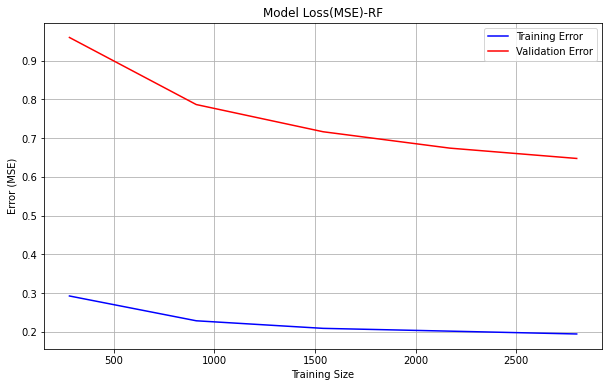

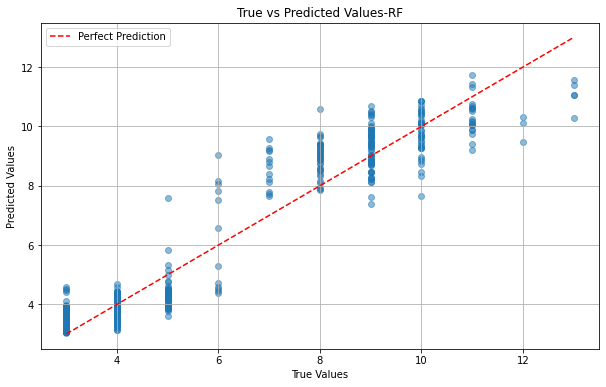

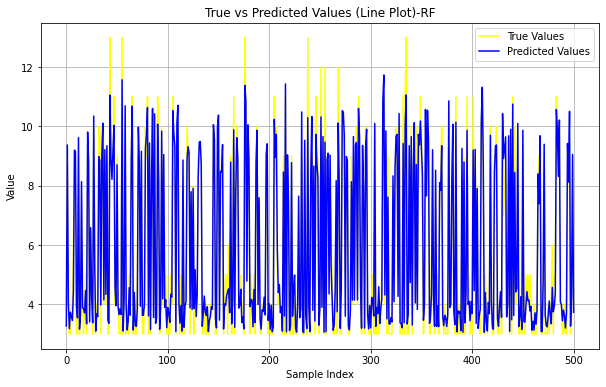

In [5]:
# Model evaluation function
def evaluate_model(model, X_valid, y_valid, X_test, y_test, output_dir):
    # Validation set evaluation
    y_valid_pred = model.predict(X_valid)
    valid_mse = mean_squared_error(y_valid, y_valid_pred)
    valid_mae = mean_absolute_error(y_valid, y_valid_pred)
    valid_r2 = r2_score(y_valid, y_valid_pred)
    valid_explained_var = explained_variance_score(y_valid, y_valid_pred)
    valid_eval_message = f"Validation MSE: {valid_mse:.4f}, MAE: {valid_mae:.4f}, R^2: {valid_r2:.4f}, Explained Variance: {valid_explained_var:.4f}"
    print(valid_eval_message)
    logging.info(valid_eval_message)
    
    # Test set evaluation
    y_test_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_explained_var = explained_variance_score(y_test, y_test_pred)
    test_eval_message = f"Test MSE: {test_mse:.4f}, MAE: {test_mae:.4f}, R^2: {test_r2:.4f}, Explained Variance: {test_explained_var:.4f}"
    print(test_eval_message)
    logging.info(test_eval_message)
    predictions_file = os.path.join(dir_output, 'predictions.csv')
    np.savetxt(predictions_file, y_test_pred, delimiter=',')
    # Save the model
    model_save_path = os.path.join(dir_output, 'random_forest_model.h5')
    joblib.dump(model, model_save_path)
    logging.info(f"Optimized model saved to {model_save_path}")
    
    # Generate learning curve
    train_sizes, train_scores, valid_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
    )
    
    train_errors = -train_scores.mean(axis=1)
    valid_errors = -valid_scores.mean(axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_errors, label="Training Error" ,color='blue')
    plt.plot(train_sizes, valid_errors, label="Validation Error", color='red')
    plt.title("Model Loss(MSE)-RF")
    plt.xlabel("Training Size")
    plt.ylabel("Error (MSE)")
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join(dir_output, 'training_loss.png'))
    plt.show()

    # True vs Predicted scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_test_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label="Perfect Prediction")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title("True vs Predicted Values-RF")
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join(dir_output, 'training_loss.png'))
    plt.show()

    # True vs Predicted line plot
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label="True Values", color='yellow', linewidth=1.5)
    plt.plot(y_test_pred, label="Predicted Values",color='blue', linewidth=1.5)
    plt.title("True vs Predicted Values (Line Plot)-RF")
    plt.xlabel("Sample Index")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()

# Execute the evaluation and saving process
#dir_output = "output_directory"
os.makedirs(dir_output, exist_ok=True)
evaluate_model(best_rf_model, X_valid, y_valid, X_test, y_test, dir_output)